In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('titanic-training-data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape


(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.drop(columns = ['PassengerId','Name','Ticket','Cabin'],axis=1, inplace=True)

In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [10]:
q1= df["Age"].quantile(0.25)
q3= df["Age"].quantile(0.75)

iqr=q3-q1
iqr

17.875

In [11]:
lower_threshold = q1- 1.5* iqr
upper_threshold = q3 + 1.5* iqr
print(lower_threshold)
print(upper_threshold)

-6.6875
64.8125


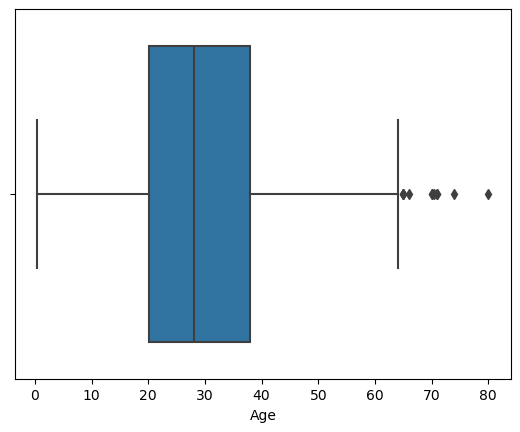

In [12]:
sns.boxplot(x = 'Age', data = df)
plt.show()

In [13]:
df['Age'] = np.where(df['Age'] > upper_threshold, upper_threshold, df['Age'] )
df['Age'] = np.where(df['Age'] < lower_threshold, lower_threshold, df['Age'] )

In [14]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [15]:
import numpy as np
arr = np.array([1, 2, 3, 4, 5])
result = np.where(arr > 3)
print(result)


(array([3, 4], dtype=int64),)


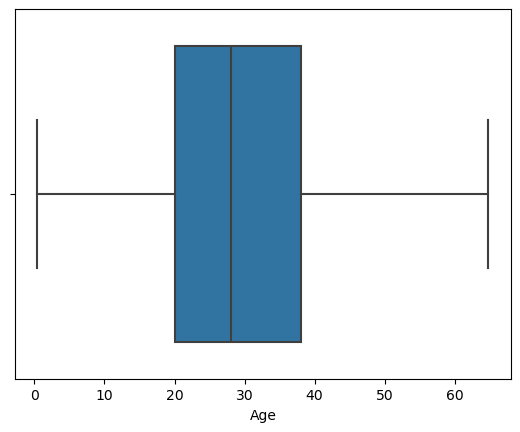

In [16]:
sns.boxplot(x = 'Age', data = df)
plt.show()

In [17]:
# df['Age'].value_counts()
df.sort_values('Age',ascending=False)
# df.shape

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
493,0,1,male,64.8125,0,0,49.5042,C
851,0,3,male,64.8125,0,0,7.7750,S
630,1,1,male,64.8125,0,0,30.0000,S
96,0,1,male,64.8125,0,0,34.6542,C
54,0,1,male,64.8125,0,1,61.9792,C
...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C
863,0,3,female,NaN,8,2,69.5500,S
868,0,3,male,NaN,0,0,9.5000,S
878,0,3,male,NaN,0,0,7.8958,S


In [18]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


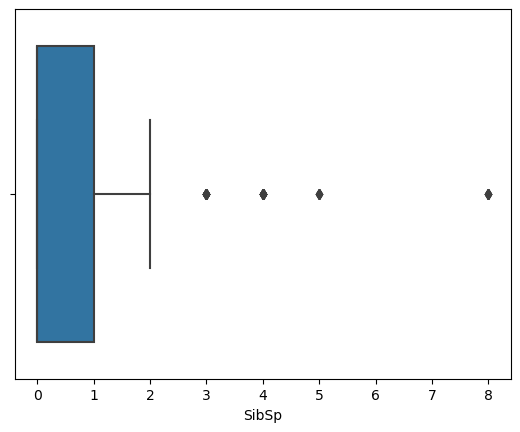

In [19]:
sns.boxplot(x='SibSp',data=df)
plt.show()

In [20]:
age_median = df['Age'].median()
age_median

28.0

In [21]:
# missing value is replaced by missing values
df['Age'].replace(np.nan, age_median, inplace=True)

In [22]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [23]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [24]:
emp_mode = df['Embarked'].mode()
emp_mode

0    S
Name: Embarked, dtype: object

In [25]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [26]:
df['Embarked'] = df['Embarked'].replace(np.nan, emp_mode[0])

In [27]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [28]:
duplicate = df.duplicated()
duplicate.sum()
df[duplicate]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
47,1,3,female,28.0,0,0,7.7500,Q
55,1,1,male,28.0,0,0,35.5000,S
76,0,3,male,28.0,0,0,7.8958,S
77,0,3,male,28.0,0,0,8.0500,S
87,0,3,male,28.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S
877,0,3,male,19.0,0,0,7.8958,S
878,0,3,male,28.0,0,0,7.8958,S
884,0,3,male,25.0,0,0,7.0500,S


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


## Encoding

In [30]:
df=pd.get_dummies(df, columns=["Sex","Embarked","Pclass"])
df.head()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,False,True,False,False,True,False,False,True
1,1,38.0,1,0,71.2833,True,False,True,False,False,True,False,False
2,1,26.0,0,0,7.9250,True,False,False,False,True,False,False,True
3,1,35.0,1,0,53.1000,True,False,False,False,True,True,False,False
4,0,35.0,0,0,8.0500,False,True,False,False,True,False,False,True


In [31]:
df.dtypes

Survived        int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_female       bool
Sex_male         bool
Embarked_C       bool
Embarked_Q       bool
Embarked_S       bool
Pclass_1         bool
Pclass_2         bool
Pclass_3         bool
dtype: object

In [32]:
df.isnull().sum()

Survived      0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Pclass_1      0
Pclass_2      0
Pclass_3      0
dtype: int64

In [33]:
#df[['Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3']] = df[['Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3']].astype(int)


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

In [35]:
X = df.drop(['Survived'], axis=1)

y = df[['Survived']]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=0)

In [48]:
import warnings
warnings.filterwarnings("ignore")

In [49]:
model=LogisticRegression()
model.fit(X_train, y_train)
model

LogisticRegression()

In [47]:
model.score(X_train,y_train)

0.8089887640449438

In [40]:
from sklearn import metrics

In [42]:
predictions=model.predict(X_test)

<Axes: >

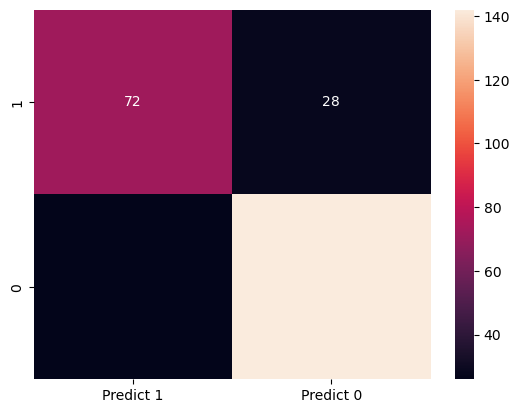

In [44]:
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

sns.heatmap(df_cm, annot=True,fmt='g')

In [45]:
cm = metrics.confusion_matrix(y_test, predictions, labels=[1, 0])
# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create DataFrame from normalized confusion matrix
df_cm = pd.DataFrame(cm_normalized, index=["1", "0"], columns=["Predict 1", "Predict 0"])

<Axes: >

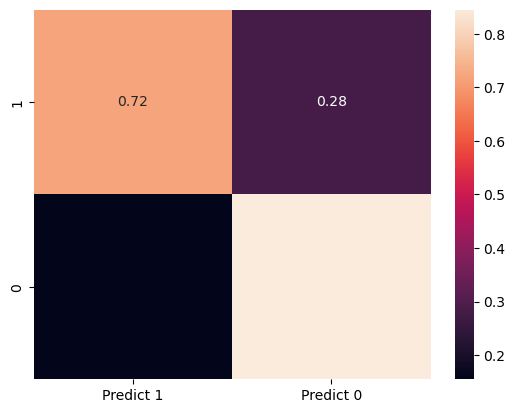

In [46]:
sns.heatmap(df_cm, annot=True,fmt='g')